## All profiles using P20 probe

Use calibration either July 12th (if not all probes connected at the same time) or August 9th (If all connected simultaneously)

In [2]:
import cmocean as cmo
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import os
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts')
import profiler_tools as ptools
import conduino_tools as ctools


In [3]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [6]:
# Dictionaries:

T01 = {"date": "31Jul19",
       "Nsb": 1.23 ,
       "Nshelf": 1.5,
       "fo": 0.5 ,
       "U":0.5 ,
       "run_num": 3,''
       "dir": '../experiments/exp_31jul19/',
       "run_files":['04_profile.mat','08_profile.mat','10_profile.mat'],
       "color":'mediumseagreen',
       "rho_top":[1.01706,1.01775,1.01782],
       "rho_sb":[1.02405,1.02349,1.02401],
       "rho_bot":[1.03744,1.03791,1.03715],
       "hsb":2.9,
       "hbot":9.5,
       "calibration":'09Aug19',
       }
T02 = {"date": "01Aug19",
       "Nsb": 1.03 ,
       "Nshelf": 1.02,
       "fo": 0.5 ,
       "U":0.5 ,
       "run_num": 2,''
       "dir": '../experiments/exp_01aug19/',
       "run_files":['05_profile1.mat','07_profile2.mat','11_profile3.mat'],
       "color":'darkcyan',
       "rho_top":[1.01167,1.01238,1.01240],
       "rho_sb":[1.01470,1.01553,1.01542],
       "rho_bot":[1.02617,1.02569,1.02610],
       "hsb":2.9,
       "hbot":9.5,
       "calibration":'09Aug19',
       }
T03 = {"date": "05Aug19",
       "Nsb": 0.92 ,
       "Nshelf": 1.2,
       "fo": 0.5 ,
       "U":0.5 ,
       "run_num": 2,''
       "dir": '../experiments/exp_05aug19/',
       "run_files":['03_profile.mat','06_profiler.mat'],
       "color":'darkslateblue',
       "rho_top":[1.00764,1.00828,np.nan],
       "rho_sb":[1.01184,1.01273,np.nan],
       "rho_bot":[1.01819,1.01842,np.nan],
       "hsb":2.85,
       "hbot":9.45,
       "calibration":'09Aug19',
       }

T04 = {"date": "07Aug19",
       "Nsb": 1.46 ,
       "Nshelf": 1.47,
       "fo": 0.5 ,
       "U":0.5 ,
       "run_num": 2,
       "dir": '../experiments/exp_07aug19/',
       "run_files":['03_profile.mat','05_profile.mat'],
       "color":'darkmagenta',
       "rho_top":[1.00977,1.00967,1.01110,np.nan],
       "rho_sb":[1.01612,1.01680,1.01617,np.nan],
       "rho_bot":[1.02616,1.02611,1.02593,np.nan],
       "hsb":2.9,
       "hbot":9.5,
       "calibration":'09Aug19',
       }

T05 = {"date": "08Aug19",
       "Nsb": 1.46 ,
       "Nshelf": 1.45,
       "fo": 0.5 ,
       "U":0.5 ,
       "run_num": 2,
       "dir": '../experiments/exp_08aug19/',
       "run_files":['02_profile1.mat','05_profile2.mat'],
       "color":'plum',
       "rho_top":[1.01740,1.01781,np.nan],
       "rho_sb":[1.02351,1.02408,np.nan],
       "rho_bot":[1.03658,1.03651,np.nan],
       "hsb":2.9,
       "hbot":9.5,
       "calibration":'09Aug19',
       }
T06 = {"date": "10Aug19",
       "Nsb": 1.81 ,
       "Nshelf": 1.81,
       "fo": 0.8 ,
       "U":0.5 ,
       "run_num": 1,
       "dir": '../experiments/exp_10aug19/',
       "run_files":['04_profile1.mat'],
       "color":'coral',
       "rho_top":[1.01580,1.01575,1.01607],
       "rho_sb":[1.02557,1.02362,1.02415],
       "rho_bot":[1.04029,1.04106,1.04006],
       "hsb":2.85,
       "hbot":9.45,
       "calibration":'09Aug19',
       }

In [7]:
exp_dicts = [T01,T02,T03,T04,T05,T06]
exp_num = len(exp_dicts) # number of experiment dictionaries

colors = ['teal','darkorange','yellowgreen', 'tan']

../experiments/exp_31jul19/04_profile.mat
../experiments/exp_31jul19/08_profile.mat
../experiments/exp_31jul19/10_profile.mat
../experiments/exp_01aug19/05_profile1.mat
../experiments/exp_01aug19/07_profile2.mat
../experiments/exp_01aug19/11_profile3.mat
../experiments/exp_05aug19/03_profile.mat
../experiments/exp_05aug19/06_profiler.mat
../experiments/exp_07aug19/03_profile.mat
../experiments/exp_07aug19/05_profile.mat
../experiments/exp_08aug19/02_profile1.mat
../experiments/exp_08aug19/05_profile2.mat
../experiments/exp_10aug19/04_profile1.mat


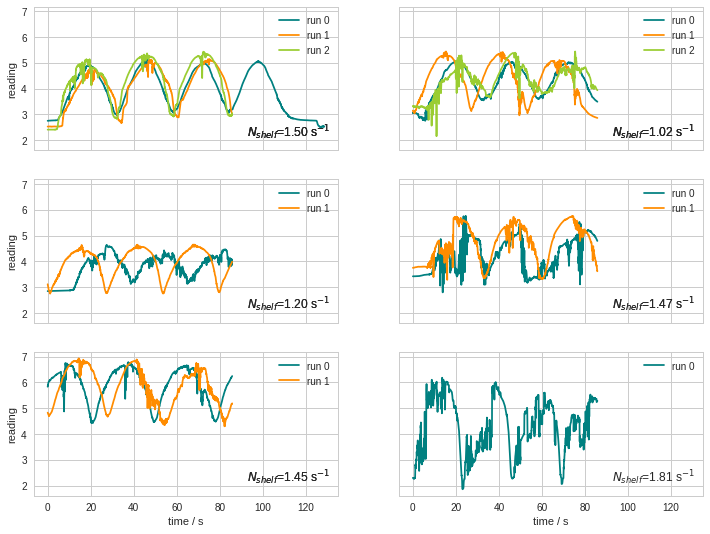

In [11]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(12,9), sharex=True, sharey=True)
axs = [ax1,ax2,ax3,ax4,ax5,ax6]

for exp, ax in zip(exp_dicts, axs):
    for ii, col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        print(filepath)
        mat = sio.loadmat(filepath, squeeze_me=True)
        P3 = mat['ch3']
        time = mat['time']
        ax.plot(time,P3,'-',color=col, label='run %d' %ii)
        ax.text(0.7,0.1,'$N_{shelf}$=%1.2f s$^{-1}$' %exp["Nshelf"], transform=ax.transAxes)
    ax.legend(bbox_to_anchor=(1,1))

ax6.set_xlabel('time / s')
ax5.set_xlabel('time / s')

for ax in [ax1,ax3,ax5]:
    ax.set_ylabel('reading')

Filtered readings

../experiments/exp_31jul19/04_profile.mat
../experiments/exp_31jul19/08_profile.mat
../experiments/exp_31jul19/10_profile.mat
../experiments/exp_01aug19/05_profile1.mat
../experiments/exp_01aug19/07_profile2.mat
../experiments/exp_01aug19/11_profile3.mat
../experiments/exp_05aug19/03_profile.mat
../experiments/exp_05aug19/06_profiler.mat
../experiments/exp_07aug19/03_profile.mat
../experiments/exp_07aug19/05_profile.mat
../experiments/exp_08aug19/02_profile1.mat
../experiments/exp_08aug19/05_profile2.mat
../experiments/exp_10aug19/04_profile1.mat


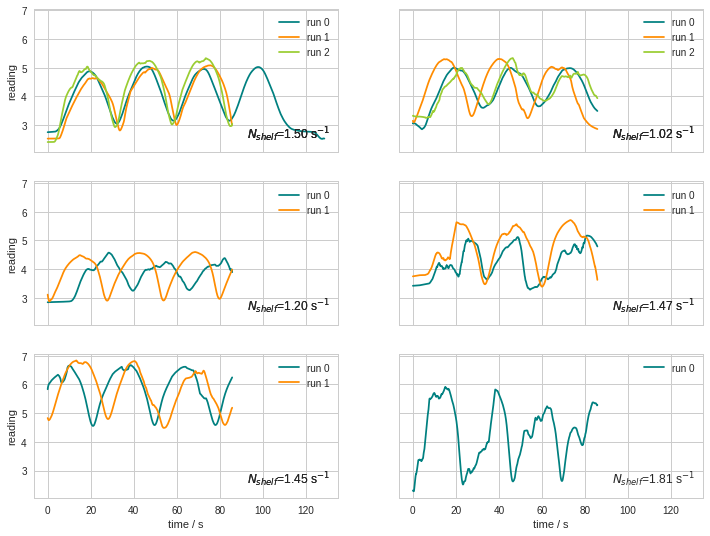

In [13]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(12,9), sharex=True, sharey=True)
axs = [ax1,ax2,ax3,ax4,ax5,ax6]

for exp, ax in zip(exp_dicts, axs):
    for ii, col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        print(filepath)
        mat = sio.loadmat(filepath, squeeze_me=True)
        P3_unfilt = mat['ch3']
        P3 = ctools.filter_timeseries(P3_unfilt,winlen=70)
        time = mat['time']
        ax.plot(time,P3,'-',color=col, label='run %d' %ii)
        ax.text(0.7,0.1,'$N_{shelf}$=%1.2f s$^{-1}$' %exp["Nshelf"], transform=ax.transAxes)
    ax.legend(bbox_to_anchor=(1,1))

ax6.set_xlabel('time / s')
ax5.set_xlabel('time / s')

for ax in [ax1,ax3,ax5]:
    ax.set_ylabel('reading')

../experiments/exp_31jul19/04_profile.mat
../experiments/exp_31jul19/08_profile.mat
../experiments/exp_31jul19/10_profile.mat
../experiments/exp_01aug19/05_profile1.mat
../experiments/exp_01aug19/07_profile2.mat
../experiments/exp_01aug19/11_profile3.mat
../experiments/exp_05aug19/03_profile.mat
../experiments/exp_05aug19/06_profiler.mat
../experiments/exp_07aug19/03_profile.mat
../experiments/exp_07aug19/05_profile.mat
../experiments/exp_08aug19/02_profile1.mat
../experiments/exp_08aug19/05_profile2.mat
../experiments/exp_10aug19/04_profile1.mat


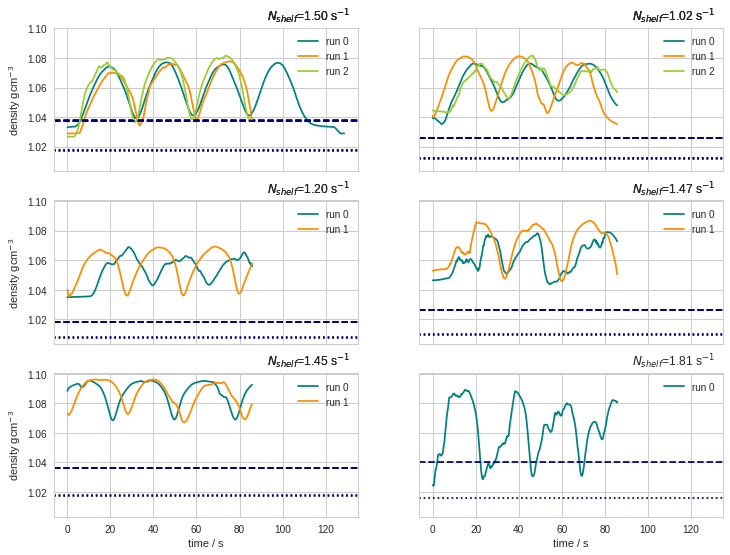

In [27]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(12,9), sharex=True, sharey=True)
axs = [ax1,ax2,ax3,ax4,ax5,ax6]

for exp, ax in zip(exp_dicts, axs):
    for ii, col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        print(filepath)
        mat = sio.loadmat(filepath, squeeze_me=True)
        P3_unfilt = mat['ch3']
        P3 = ctools.filter_timeseries(P3_unfilt,winlen=70)
        dens = ctools.densP_09Aug19(P3)
        time = mat['time']
        ax.plot(time,dens,'-',color=col, label='run %d' %ii)
        ax.text(0.7,1.05,'$N_{shelf}$=%1.2f s$^{-1}$' %exp["Nshelf"], transform=ax.transAxes)
        ax.axhline(exp["rho_top"][ii],color='navy', linestyle=':')
        ax.axhline(exp["rho_bot"][ii], color='navy', linestyle='--')
    ax.legend(bbox_to_anchor=(1,1))

ax6.set_xlabel('time / s')
ax5.set_xlabel('time / s')

for ax in [ax1,ax3,ax5]:
    ax.set_ylabel('density gcm$^{-3}$')